In [1]:
# ! pip install datasets

In [2]:
from datasets import load_dataset

ds = load_dataset("community-datasets/gnad10")

/home/6082/.conda/envs/daheim/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_train = ds['train'].to_pandas()
df_test = ds['test'].to_pandas()

In [4]:
df_train

,text,label
0,21-Jähriger fällt wohl bis Saisonende aus. Wie...,4
1,"Erfundene Bilder zu Filmen, die als verloren g...",8
2,Der frischgekürte CEO Sundar Pichai setzt auf ...,0
3,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",3
4,Estland sieht den künftigen österreichischen P...,5
...,...,...
9240,Bernd Saurer war Bridge-Juniorenweltmeister un...,5
9241,Sandhere soll in vergangener Woche bei Luftang...,2
9242,Derzeit Konzeptgruppe in Berlin – Kein Komment...,3
9243,Landeshauptmann will den vierten Regierungssit...,5


In [5]:
labels = ds['train'].features['label'].names
for idx, label in enumerate(labels):
    print(f"{idx}: {label}")

0: Web
1: Panorama
2: International
3: Wirtschaft
4: Sport
5: Inland
6: Etat
7: Wissenschaft
8: Kultur


In [6]:
df_train.isna().sum()

text     0
label    0
dtype: int64

In [7]:
# ! pip install nltk 

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [9]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/6082/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/6082/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

- "https://www.geeksforgeeks.org/python-remove-punctuation-from-string/" 


In [10]:
print(type(df_train['text'].iloc[0]))
print(df_train['text'].iloc[0][:100])  # Print first 100 chars

<class 'str'>
21-Jähriger fällt wohl bis Saisonende aus. Wien – Rapid muss wohl bis Saisonende auf Offensivspieler


In [11]:
def preprocess_text(text):
   # Join list into string

   text = text.lower()
   text = ''.join([char for char in text if char not in string.punctuation])

   return text

In [12]:
# First preprocess and tokenize
df_train['processed_text'] = df_train['text'].apply(preprocess_text)


In [13]:
df_test['processed_text'] = df_test['text'].apply(preprocess_text)


In [14]:
df_train

,text,label,processed_text
0,21-Jähriger fällt wohl bis Saisonende aus. Wie...,4,21jähriger fällt wohl bis saisonende aus wien ...
1,"Erfundene Bilder zu Filmen, die als verloren g...",8,erfundene bilder zu filmen die als verloren ge...
2,Der frischgekürte CEO Sundar Pichai setzt auf ...,0,der frischgekürte ceo sundar pichai setzt auf ...
3,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",3,putin einigung dass wir menge auf niveau von j...
4,Estland sieht den künftigen österreichischen P...,5,estland sieht den künftigen österreichischen p...
...,...,...,...
9240,Bernd Saurer war Bridge-Juniorenweltmeister un...,5,bernd saurer war bridgejuniorenweltmeister und...
9241,Sandhere soll in vergangener Woche bei Luftang...,2,sandhere soll in vergangener woche bei luftang...
9242,Derzeit Konzeptgruppe in Berlin – Kein Komment...,3,derzeit konzeptgruppe in berlin – kein komment...
9243,Landeshauptmann will den vierten Regierungssit...,5,landeshauptmann will den vierten regierungssit...


In [15]:
# ! pip install wordcloud 
# ! pip install matplotlib

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(df_train):
    # Combine all text
    text = ' '.join(df_train['processed_text'].astype(str))

    # Create and generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


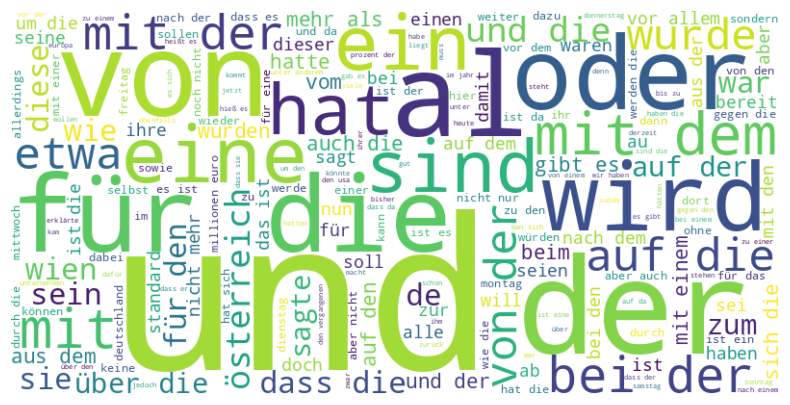

In [17]:
generate_wordcloud(df_train)

In [18]:
# ! pip install spacy 
# ! python -m spacy download de_core_news_sm

In [19]:
import spacy
from spacy import displacy

nlp = spacy.load('de_core_news_sm')

# Process sample text
sample_text = df_train['text'].iloc[3]

if isinstance(sample_text, list):
    sample_text = ' '.join(sample_text)

doc = nlp(sample_text)

# Visualize NER
displacy.render(doc, style='ent', jupyter=True)


In [20]:
# ! pip install numpy
# ! pip install scipy
# ! pip install gensim

In [21]:
from gensim.models import Word2Vec
import numpy as np

def train_word2vec(df_train):
   # Get list of tokenized sentences
   sentences = [text.split() for text in df_train['processed_text']]
   
   # Train Word2Vec
   w2v_model = Word2Vec(
        sentences=sentences,
        vector_size=100,    # Dimension of word vectors
        window=5,           # Context window size
        min_count=2,        # Ignore words that appear less than this
        workers=4,          # Number of CPU cores to use
        sg=1,              # Use skip-gram model (1) instead of CBOW (0)
        epochs=10          # Number of training epochs
    )
   
   return w2v_model

In [22]:
w2v_model = train_word2vec(df_train)


In [23]:
# Get vector for a word
def explore_word2vec(model, word, n=5):
    try:
        # Find most similar words
        similar_words = model.wv.most_similar(word, topn=n)
        print(f"\nMost similar words to '{word}':")
        for word, score in similar_words:
            print(f"{word}: {score:.4f}")
            
        # Get word vector
        vector = model.wv[word]
        print(f"\nVector dimension: {len(vector)}")
        print(f"First few values of the vector: {vector[:5]}")
        
    except KeyError:
        print(f"Word '{word}' not in vocabulary")


In [24]:
common_word = df_train['processed_text'].iloc[0].split()[0]  # First word of first document
explore_word2vec(w2v_model, common_word)


Most similar words to '21jähriger':
28jähriger: 0.8753
33jähriger: 0.8668
27jähriger: 0.8664
17jähriger: 0.8660
16jähriger: 0.8546

Vector dimension: 100
First few values of the vector: [ 0.14559071  0.14205009 -0.00846586  0.12621146  0.01406719]


In [25]:
similar_words = w2v_model.wv.most_similar('wollen', topn=10)
similar_words

[('wollten', 0.7766841650009155),
 ('möchten', 0.735885739326477),
 ('müssen', 0.7278315424919128),
 ('können', 0.7151389718055725),
 ('dürfen', 0.659096896648407),
 ('sollten', 0.639631450176239),
 ('versuchen', 0.637970507144928),
 ('tendieren', 0.6245707273483276),
 ('vorankommen', 0.6147883534431458),
 ('will', 0.6131966710090637)]

In [26]:
def get_doc_vectors(df, w2v_model):
    # Convert documents to vectors
    doc_vectors = []
    
    for text in df['processed_text']:
        # Split text into words
        words = text.split()
        # Get vectors for words in model vocabulary
        word_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
        # Calculate document vector by averaging word vectors
        if word_vecs:
            doc_vec = np.mean(word_vecs, axis=0)
        else:
            doc_vec = np.zeros(w2v_model.vector_size)
        doc_vectors.append(doc_vec)
    
    return np.array(doc_vectors)


In [27]:
# Prepare data
X_train = get_doc_vectors(df_train, w2v_model)
X_test = get_doc_vectors(df_test, w2v_model)

y_train = df_train['label']
y_test = df_test['label']


In [28]:
# ! pip install scikit-learn

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}

In [32]:
svm = SVC(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)


In [33]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.8s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.9s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.9s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   2.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   2.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   2.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   2.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.7s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.7s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [34]:
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.81763115197404


In [35]:
# Get predictions using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [36]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       168
           1       0.76      0.86      0.80       168
           2       0.87      0.83      0.85       151
           3       0.77      0.80      0.78       141
           4       0.99      0.97      0.98       120
           5       0.79      0.81      0.80       102
           6       0.84      0.57      0.68        67
           7       0.83      0.88      0.85        57
           8       0.75      0.80      0.77        54

    accuracy                           0.84      1028
   macro avg       0.84      0.82      0.82      1028
weighted avg       0.84      0.84      0.84      1028



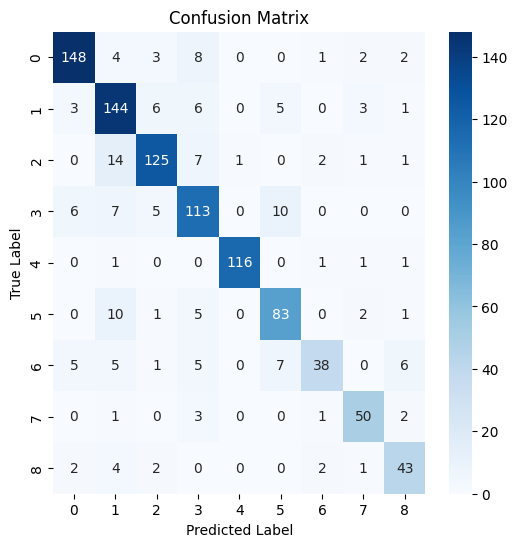

In [37]:
# Create confusion matrix visualization
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [38]:
# ! pip install seaborn

In [39]:
score = best_model.score(X_test_scaled, y_test)
print(f"Test accuracy: {score:.4f}")

Test accuracy: 0.8366


In [40]:
# ! pip install pandas

In [41]:
predictions = best_model.predict(X_test_scaled)


In [42]:
import pandas as pd

results_df = pd.DataFrame({
    'Text': [text[:50] + '...' for text in df_test['text']],  # First 50 characters of each text
    'Actual_Label': df_test['label'],
    'Predicted_Label': predictions
})


In [43]:
results_df

,Text,Actual_Label,Predicted_Label
0,"Die Gewerkschaft GPA-djp lanciert den ""All-in-...",3,3
1,Franzosen verteidigen 2:1-Führung – Kritische ...,4,4
2,Neues Video von Designern macht im Netz die Ru...,0,0
3,23-jähriger Brasilianer muss vier Spiele pausi...,4,4
4,Aufständische verwendeten Chemikalie bei Gefec...,2,2
...,...,...,...
1023,"Programm ""Ebay Plus"" soll Ende September start...",0,0
1024,"Fehlerhafte Bilanz 2013, Partei will berufen –...",5,5
1025,Als erster Olympia-Champion auch Hawaii-Sieger...,4,4
1026,Der Außenseiter aus Denver gewinnt die 50. Sup...,4,4


In [44]:
# Add confidence scores if you want
confidence_scores = best_model.decision_function(X_test_scaled)
results_df['Confidence'] = np.max(confidence_scores, axis=1)

In [45]:
print("\nLeast confident predictions:")
print(results_df.nsmallest(10, 'Confidence')[['Text', 'Actual_Label', 'Predicted_Label', 'Confidence']])


Least confident predictions:
                                                  Text  Actual_Label  \
767  Die Regatta gehört zum Spektakulärsten, auch G...             4   
842  1830 – Die provisorische Regierung proklamiert...             7   
683  Bundespräsident traf Merkel und Gauck – Bevors...             2   
415  Alle Religionen haben ihre hohen Feiertage – z...             1   
340  Verhandler, die Interessen ihrer Wähler egoist...             7   
869  Projektchef Chris Urmson über die Entscheidung...             0   
486  Jeder vierte will unpassende Geschenke weiterv...             3   
121  Derzeit wird immer wieder die Gefahr heraufbes...             1   
762  Er ist zwar nicht mehr Griechenlands Finanzmin...             1   
248  Der Vollbart ist von nun an politisch verdächt...             8   

     Predicted_Label  Confidence  
767                1    7.290549  
842                6    7.294977  
683                1    7.296065  
415                0    8.239320  
34

In [46]:
# ! pip install transformers torch

In [47]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from torch.utils.data import Dataset, DataLoader
import torch

In [48]:
model_name = "deepset/gbert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(df_train['label'].unique())
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at deepset/gbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.encodings = tokenizer(texts, truncation=True, padding=True, 
                                 max_length=512, return_tensors='pt')
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [50]:
# Prepare datasets using your preprocessed text
train_dataset = NewsDataset(
    df_train['processed_text'].tolist(),  # Using processed text from earlier
    df_train['label'].astype('int').tolist(),
    tokenizer
)

test_dataset = NewsDataset(
    df_test['processed_text'].tolist(),  # Using processed text from earlier
    df_test['label'].astype('int').tolist(),
    tokenizer
)

In [51]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [52]:
# Training setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
num_epochs = 3

In [53]:
torch.cuda.empty_cache()


In [54]:
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
        # Clear memory after each batch
        del outputs
        del loss
        torch.cuda.empty_cache()
    
    avg_loss = total_loss/len(train_loader)
    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}")

Epoch 1, Loss: 0.6155
Epoch 2, Loss: 0.2886
Epoch 3, Loss: 0.1673


In [56]:
# Evaluation
model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = outputs.logits.argmax(dim=-1)
        
        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())
        
        # Clear memory
        del outputs
        torch.cuda.empty_cache()

In [58]:
results_df2 = pd.DataFrame({
    'Text': [text[:50] + '...' for text in df_test['text']],
    'Actual_Label': df_test['label'],
    'Predicted_Label': all_predictions
})

In [59]:
results_df2

,Text,Actual_Label,Predicted_Label
0,"Die Gewerkschaft GPA-djp lanciert den ""All-in-...",3,3
1,Franzosen verteidigen 2:1-Führung – Kritische ...,4,4
2,Neues Video von Designern macht im Netz die Ru...,0,0
3,23-jähriger Brasilianer muss vier Spiele pausi...,4,4
4,Aufständische verwendeten Chemikalie bei Gefec...,2,2
...,...,...,...
1023,"Programm ""Ebay Plus"" soll Ende September start...",0,0
1024,"Fehlerhafte Bilanz 2013, Partei will berufen –...",5,5
1025,Als erster Olympia-Champion auch Hawaii-Sieger...,4,4
1026,Der Außenseiter aus Denver gewinnt die 50. Sup...,4,4


In [64]:
results_df2['Correct'] = results_df2['Actual_Label'] == results_df2['Predicted_Label']

In [65]:
print("\nAccuracy Score:", results_df['Correct'].mean())


Accuracy Score: 0.8706225680933852


In [67]:
# Show some incorrect predictions
print("\nSample of incorrect predictions:")
print(results_df[~results_df['Correct']].head(10))


Sample of incorrect predictions:
                                                 Text  Actual_Label  \
15  Landeshauptmann: "Jetzt wird Sicherheitspoliti...             5   
27  "Ich will etwas Festes, Greifbares in meiner H...             6   
37  Rechtsterroristin gibt nach jahrelangem Schwei...             2   
46  Brüche am Becken und an den Rippen, trotzdem d...             4   
51  Privater Besuch ohne Öffentlichkeit – Politike...             2   
52  Feierlichkeiten zum Jubiläum des wichtigen Ver...             7   
61  Weitgehende Entmachtung des Senats und Verklei...             2   
63  Explosion auf der Einkaufsstraße Istiklal Cadd...             2   
65  Der Staatssekretär will Start-ups stärker unte...             0   
80  Deutschlands Justizminister Heiko Maas: "Wir d...             2   

    Predicted_Label  Correct  
15                1    False  
27                8    False  
37                1    False  
46                0    False  
51                0    False 